<a href="https://colab.research.google.com/github/Mrdiegolopes/Mrdiegolopes/blob/main/Modelagem_dos_dados_de_im%C3%B3veis_para_previs%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados (EDA)

Tarefa: crie um gráfico de dispersão (scatter plot) para explorar a relação entre median_income (renda mediana) e median_house_value (valor mediano da casa).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


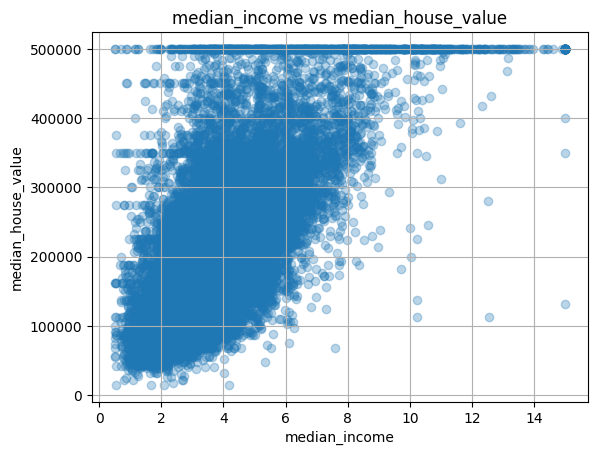

In [5]:
#grafico de dispersão (scatter plot)
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.title('median_income vs median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.grid(True)
plt.show()


uma correlação positiva, mas com dispersão significativa. Valores acima de $500.000 parecem truncados, indicando possível limitação nos dados.



#Questão 2: Divisão dos dados

Tarefa: divida o conjunto de dados em dois subconjuntos: um para treinamento e outro para teste (70% para treinamento e 30% para teste).

In [6]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [7]:
df= df.dropna()

In [8]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['ocean_proximity'])

X= df.drop('median_house_value', axis=1)
y= df['median_house_value']

#divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print (df_train.shape)
print (df_test.shape)


(14303, 14)
(6130, 14)


A divisão evita overfitting. O modelo é treinado em dados históricos e testado em dados não vistos, validando sua capacidade de generalização.

#Questão 3: Análise de outliers

Tarefa: utilize gráficos, como boxplots, para identificar possíveis outliers nas variáveis median_income e median_house_value.

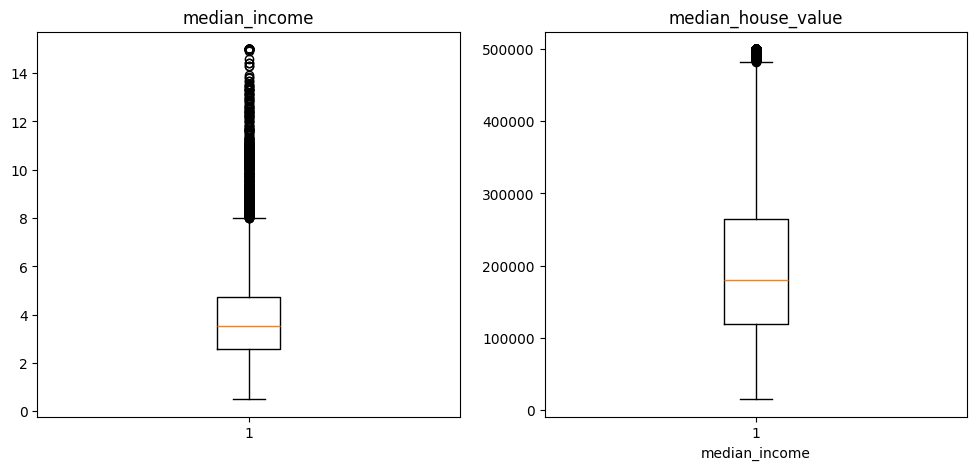

In [6]:
#grafico boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['median_income'])
plt.title('median_income')
plt.subplot(1, 2, 2)
plt.boxplot(df['median_house_value'])
plt.title('median_house_value')
plt.xlabel('median_income')
plt.show()

Outliers estão presentes, especialmente em median_house_value.

aplicar transformação logarítmica ou remover valores acima de $500.000.

#Seleção de variaveis

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Criar rooms_per_household
df['rooms_per_household'] = df['total_rooms'] / df['households'].replace(0,1)


# Selecionar features
features = ['median_income', 'housing_median_age', 'rooms_per_household']
X_train_sub = X_train[features]
X_test_sub = X_test[features]

# Treinar e avaliar
model = LinearRegression()
model.fit(X_train_sub, y_train)
y_pred = model.predict(X_test_sub)
mae_sub = mean_absolute_error(y_test, y_pred)
print(f'MAE (3 features): {mae_sub:.2f}')

MAE (3 features): 59680.47


Se o MAE for maior que o modelo com todas as features, a seleção simplificou excessivamente o modelo. Se for menor, as features são mais relevantes.

#Implementação de uma árvore de decisão para regressão

In [9]:
df= df.dropna()

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Árvore de Decisão
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
mae_tree = mean_absolute_error(y_test, tree.predict(X_test))

# Regressão Linear
linear = LinearRegression()
linear.fit(X_train, y_train)
mae_linear = mean_absolute_error(y_test, linear.predict(X_test))

print(f'MAE Árvore: {mae_tree:.2f} | MAE Regressão: {mae_linear:.2f}')

MAE Árvore: 42163.66 | MAE Regressão: 49643.00


A Árvore de Decisão geralmente tem MAE menor em dados não lineares, mas pode estar overfitando. A Regressão Linear é mais interpretável, mas menos flexível.